In [1]:
import os

In [3]:
# Import image class of matplotlib
from matplotlib import pyplot as plt
from matplotlib import image as img
from scipy.cluster.vq import kmeans, vq
from scipy.cluster.vq import whiten
import pandas as pd
import seaborn as sns

(1309, 736, 3)


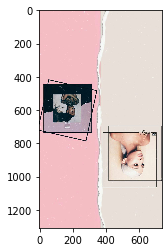

In [4]:
# Read image and print dimensions
image = img.imread('ariana.jpg')
print(image.shape)
plt.imshow(image)

In [5]:
r, g, b = [],[],[]

In [6]:
# Store RGB values of all pixels in lists r, g and b
for rows in image:
    for temp_r, temp_g, temp_b in rows:
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)

In [7]:
df = pd.DataFrame({'scaled_red':whiten(r),'scaled_green': whiten(g),'scaled_blue': whiten(b)})
org = pd.DataFrame({'red':r,'green':g, 'blue':b})

In [8]:
distortions = []
clus = []
num_clusters = range(1, 7)

In [9]:
# Create a list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(df[['scaled_red','scaled_green', 'scaled_blue']], i)
    print('Performing {}/7 clustering..'.format(i+1))
    distortions.append(distortion)
    clus.append(cluster_centers)

In [10]:
# Create a data frame with two lists, num_clusters and distortions
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})

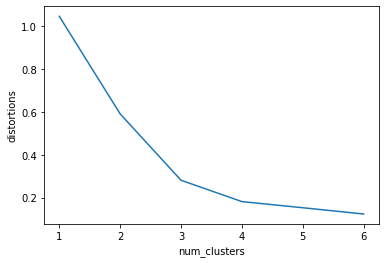

In [11]:
# Create a line plot of num_clusters and distortions
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [12]:
# Get standard deviations of each color
r_std, g_std, b_std = org[['red','green', 'blue']].std()

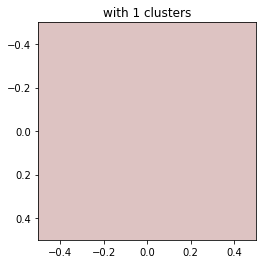

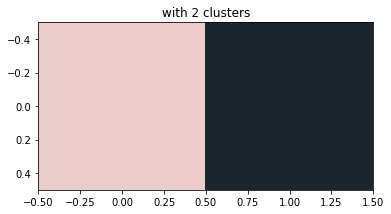

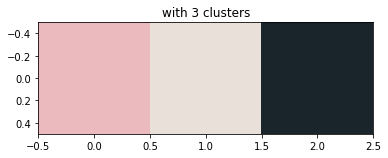

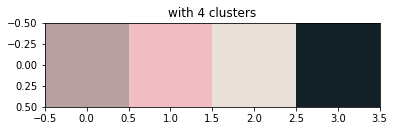

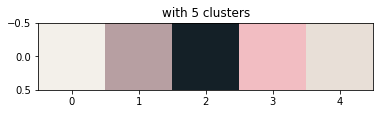

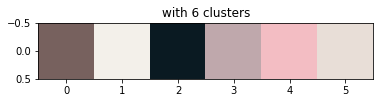

In [13]:
for n,cluster_centers in enumerate(clus):
    colors =[]
    
    for cluster_center in cluster_centers:
        scaled_r, scaled_g, scaled_b = cluster_center
        # Convert each standardized value to scaled value
        colors.append((
            scaled_r * r_std / 255,
            scaled_g * g_std / 255,
            scaled_b * b_std / 255
        ))
    
    # Display colors of cluster centers
    plt.title('with ' + str(n+1) + ' clusters')
    plt.imshow([colors])
    plt.show()

In [14]:
# Assign cluster labels
org['cluster_labels'], _ = vq(org, cluster_centers)

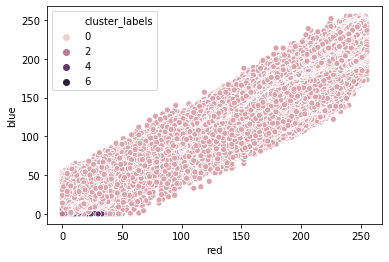

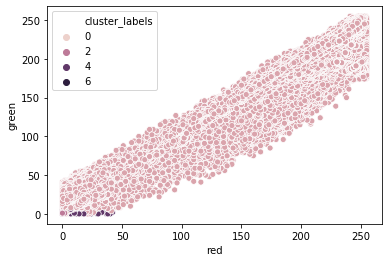

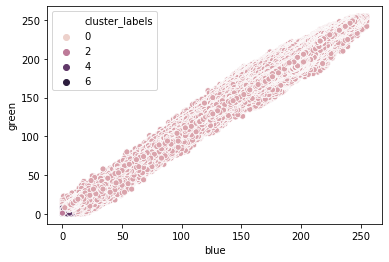

In [17]:
from itertools import combinations
l = ['red', 'blue', 'green']
# Plot the points with seaborn
for (x,y) in combinations(l,2):
    sns.scatterplot(x=x, y=y, hue='cluster_labels', data=org)
    plt.show()